🗒
## Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

## DATA VALIDATION

The original dataset consists of 14,999 rows and 10 columns. After renaming the columns, standardizing the column names, and removing duplicates, the dataset now has 11,991 rows and 10 columns. Here is a summary of the actions taken for each column:

1. satisfaction_level: Checked for any missing values and outliers. The data was within the expected range of 0-1. No action was required.
2. last_evaluation: Checked for any missing values and outliers. The data was within the expected range of 0-1. No action was required.
3. number_project: Checked for any missing values and verified the data type as 'integer'. No action was required.
4. avg_monthly_hours: Checked for any missing values, corrected the column name from 'average_montly_hours' to 'avg_monthly_hours', and verified the data type as 'integer'. No further action was required.
5. tenure: Checked for any missing values, corrected the column name from 'time_spend_company' to 'tenure', and verified the data type as 'integer'. No further action was required.
6. work_accident: Checked for any missing values, corrected the column name from 'Work_accident' to 'work_accident', and verified the data type as 'integer'. No further action was required.
7. left: Checked for any missing values and inconsistencies. Verified the data type as 'integer'. No action was required.
8. promotion_last_5years: Checked for any missing values and inconsistencies. Verified the data type as 'integer'. No action was required.
9. department: Checked for any missing values, spelling errors, or inconsistencies in department names. Corrected the column name from 'Department' to 'department', updated department names to make them shorter and more uniform, and converted the data type to 'object'. No further action was required.
10. salary: Checked for any missing values and inconsistencies in salary values. No further action was required.

In summary, the data validation and cleaning process addressed the column names and removed duplicate entries present in the original dataset. The cleaned dataset now has 11,991 rows and 10 columns, and it is ready for further analysis and modeling.

### Load dataset

The dataset is located in the same folder as this notebook (i.e., in the current working directory on Coursera), and is called **`HR_capstone_dataset.csv`.** You can read in this data directly from Coursera without having to download it.

In [2]:
# Load dataset into a dataframe
df = pd.read_csv('HR_capstone_dataset.csv')


# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns and values

As a data cleaning step, rename the columns and values as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df.rename(columns={'average_montly_hours': 'avg_monthly_hours','time_spend_company': 'tenure','Work_accident': 'work_accident','Department': 'department',}, inplace=True)


# Display all column names after the update
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
# Define a dictionary containing the current department names and their shortened versions
department_replacements = {
    'sales': 'Sales',
    'technical': 'Tech',
    'support': 'Supp',
    'IT': 'IT',
    'product_mng': 'ProdMng',
    'marketing': 'Mktg',
    'RandD': 'RnD',
    'accounting': 'Acct',
    'hr': 'HR',
    'management': 'Mgmt'
}

# Replace the department names in the 'department' column
df['department'] = df['department'].replace(department_replacements)

# Check the updated department names
print(df['department'].value_counts())

Sales      4140
Tech       2720
Supp       2229
IT         1227
ProdMng     902
Mktg        858
RnD         787
Acct        767
HR          739
Mgmt        630
Name: department, dtype: int64


### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hours        0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df.duplicated().sum()


3008

In [11]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,Sales,low
866,0.41,0.46,2,128,3,0,1,0,Acct,low
1317,0.37,0.51,2,127,3,0,1,0,Sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RnD,low
1461,0.42,0.53,2,142,3,0,1,0,Sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   avg_monthly_hours      11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

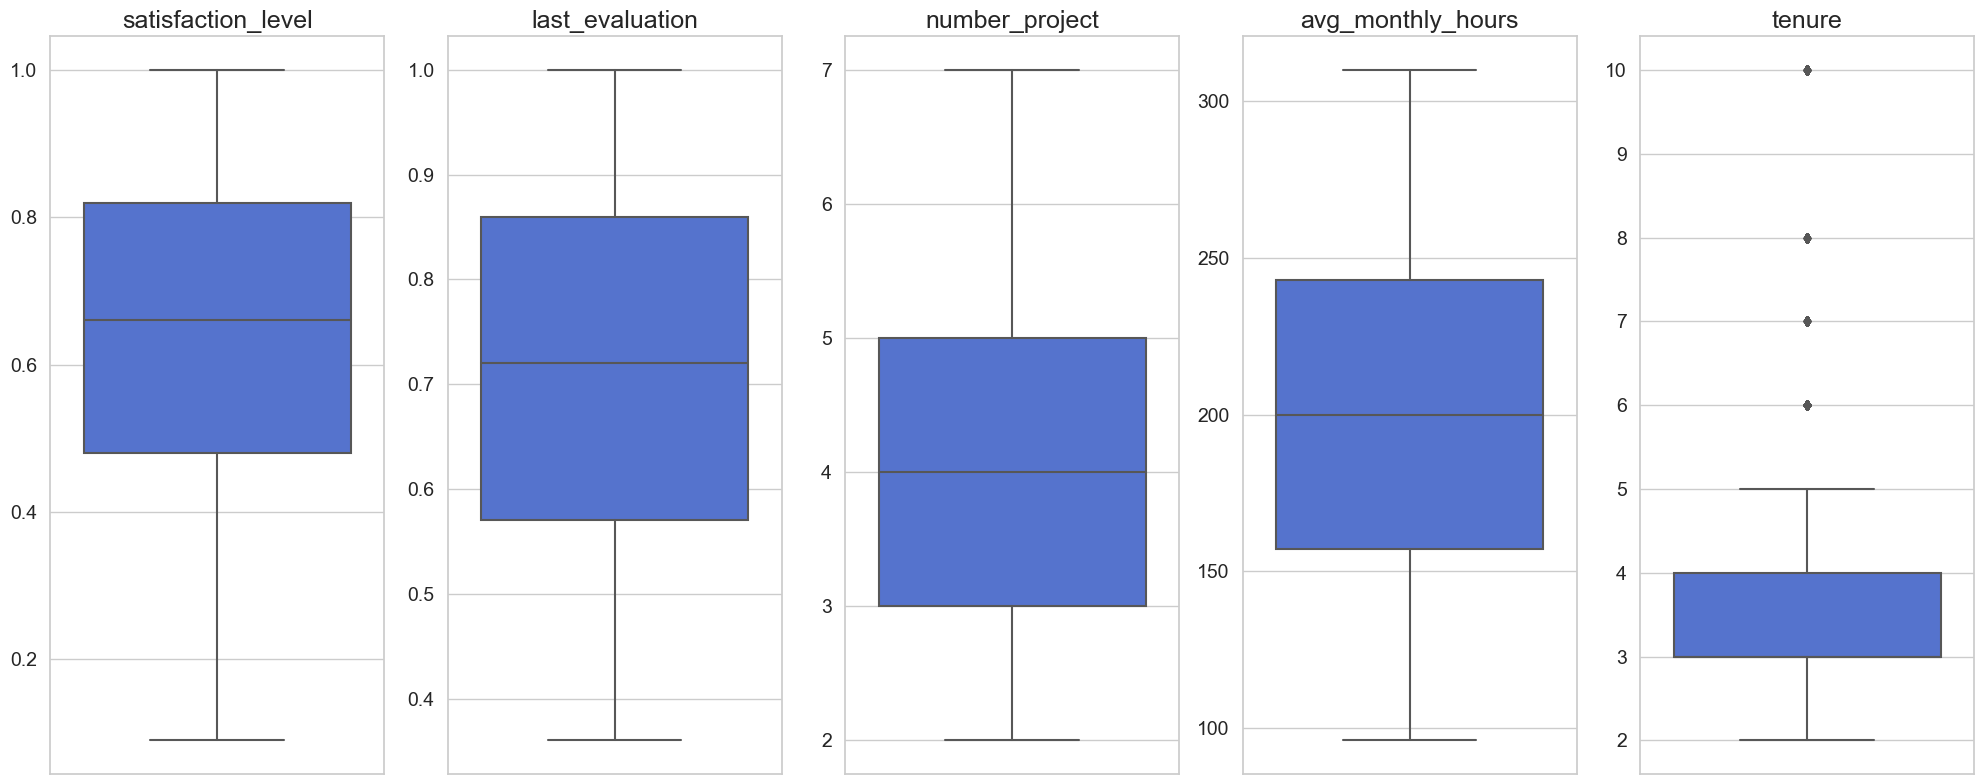

In [13]:
# Set the style and context for Seaborn plots
sns.set(style="whitegrid")

# Select the numerical columns
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'avg_monthly_hours', 'tenure']

# Plot the box plots for all numerical columns in a single figure
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(20, 8))

for index, column in enumerate(numerical_columns):
    sns.boxplot(y=column, data=df, ax=axes[index], color='royalblue')
    axes[index].set_title(column, fontsize=18)
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')
    axes[index].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

In [14]:
# Determine the number of rows containing outliers

q1 = np.percentile(df["tenure"], 25)
q3 = np.percentile(df["tenure"], 75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
outliers = df[(df["tenure"] < lower_bound) | (df["tenure"] > upper_bound)]
num_outliers = len(outliers)
print(f"Number of outliers in the tenure column: {num_outliers}")

Number of outliers in the tenure column: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Data Exploration (Continue EDA)

### Data visualizations

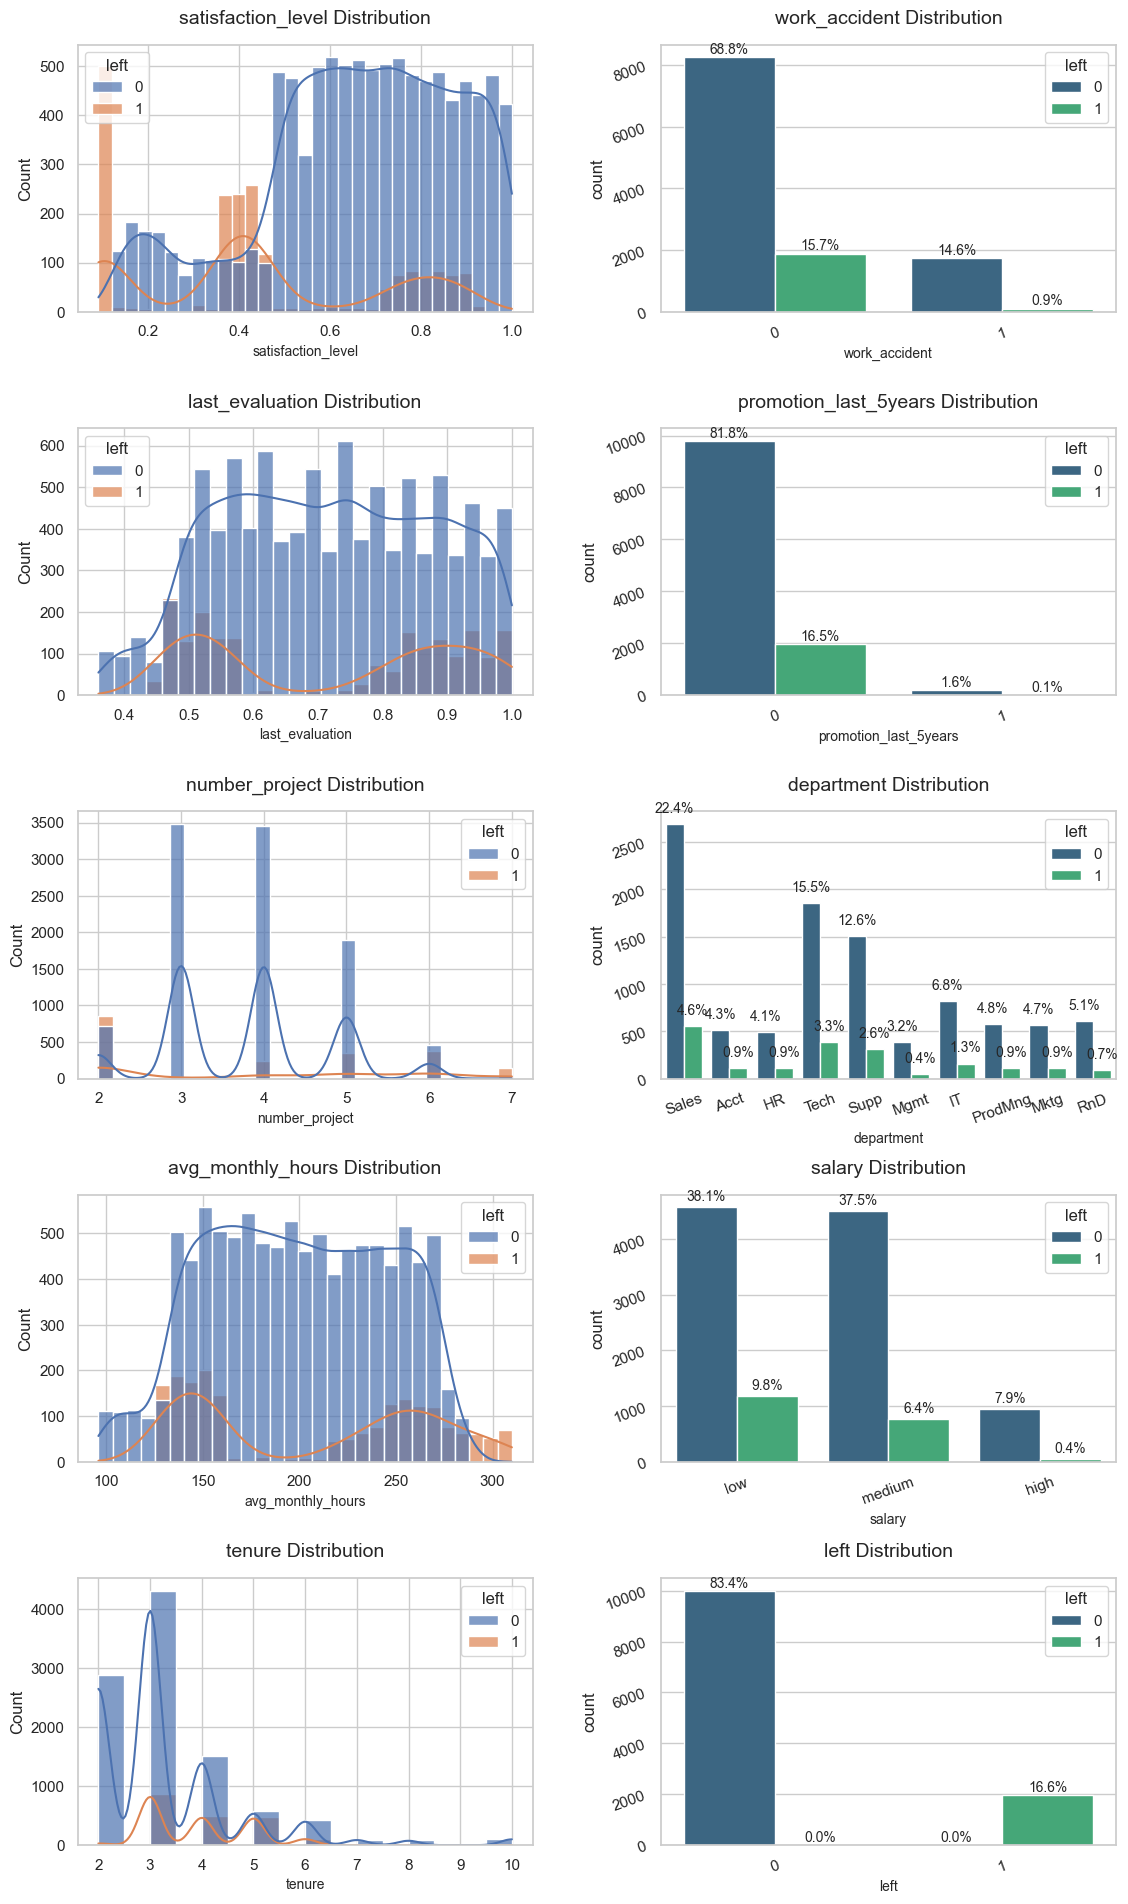

In [15]:
# Data preparation
num_vars = ['satisfaction_level', 'last_evaluation', 'number_project', 'avg_monthly_hours', 'tenure']
cat_vars = ['work_accident', 'promotion_last_5years', 'department', 'salary','left']

# Create a 5x5 grid of plots
fig, axes = plt.subplots(5, 5, figsize=(30, 20))
fig.tight_layout(pad=5.0)

# Custom function to add percentage values on bar plots
def add_percentages_on_bars(ax):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height / len(df) * 100:.1f}%', (x + width / 2, y + height + 0.01 * len(df)), ha='center', fontsize=10)

# Loop through numerical variables to create histograms
for i, var in enumerate(num_vars):
    if var == 'tenure':
        bins = df[var].nunique() * 2
    else:
        bins = 'auto'
    
    sns.histplot(data=df, x=var, hue='left', kde=True, bins=bins, ax=axes[i, 0], color='steelblue', alpha=0.7)
    axes[i, 0].set_title(f'{var} Distribution', fontsize=14, pad=15)
    axes[i, 0].set_xlabel(var, fontsize=10)
    axes[i, 0].tick_params(axis='both', labelsize=11)

# Loop through categorical variables to create bar plots
for i, var in enumerate(cat_vars):
    ax = sns.countplot(data=df, x=var, hue='left', ax=axes[i, 1], palette="viridis")
    axes[i, 1].set_title(f'{var} Distribution', fontsize=14, pad=15)
    axes[i, 1].set_xlabel(var, fontsize=10)
    axes[i, 1].tick_params(axis='both', labelsize=11, rotation=20)
    add_percentages_on_bars(ax)

# Hide the unused subplots
for i in range(2, 5):
    for j in range(5):
        axes[j, i].set_visible(False)

plt.show()

1. Satisfaction Level:
Employees who left the company had a significantly lower average satisfaction level (0.44) compared to those who stayed (0.67). This indicates that satisfaction plays a vital role in employee retention.

2. Last Evaluation:
The average last evaluation score is quite similar between employees who left (0.72) and those who stayed (0.71). This suggests that last evaluation scores may not be a strong indicator of whether an employee is likely to leave the company.

3. Number of Projects:
Employees who left the company had a slightly higher average number of projects (3.88) compared to those who stayed (3.79). This may indicate that employees who handle more projects might be more likely to leave, potentially due to workload or burnout.

4. Average Monthly Hours:
The average monthly hours are higher for employees who left (208.16) than for those who stayed (198.94). This suggests that employees with longer working hours may be more inclined to leave the company, possibly due to burnout or work-life balance issues.

5. Tenure:
Employees who left the company had a higher average tenure (3.88 years) compared to those who stayed (3.26 years). This may indicate that employees are more likely to leave after gaining some experience in the company, possibly seeking new opportunities or better offers.

6. Work Accident:
A significantly lower percentage of employees who left had work accidents (5.68%) compared to those who stayed (18.60%). This suggests that employees who have experienced work accidents may be more likely to stay with the company, possibly due to better safety measures or support provided after the accidents.

7. Promotion in the Last 5 Years:
A small percentage of employees who left received a promotion in the last 5 years (3.94%), compared to those who stayed (16.82%). This indicates that employees who are not promoted within a certain period may be more likely to leave, perhaps due to a lack of career advancement opportunities.

8. Department:
The percentage of employees who left varies across different departments. For instance, the HR and Accounting departments have higher employee attrition rates (18.80% and 17.55% respectively) compared to the Management and R&D departments (11.93% and 12.25% respectively). This suggests that some departments might have a more challenging work environment, leading to higher employee turnover.

9. Salary:
Employees with a low salary have the highest attrition rate (20.45%), while those with a high salary have the lowest (4.85%). This indicates that salary plays a crucial role in employee retention, with higher salaries being an incentive for employees to stay with the company.

10. Left:
The overall attrition rate for the company is 16.6% (1,991 out of 11,991 employees). This provides a benchmark to measure the effectiveness of any retention strategies that the company may implement.

In conclusion, factors such as satisfaction level, average monthly hours, tenure, promotion history, department, and salary play significant roles in employee retention. The company should focus on improving these aspects to reduce employee turnover and create a more favorable work environment.

## HYPOTHESIS TESTING

In [16]:
# Define a function to perform the t-test for numerical variables
def t_test(var):
    group1 = df[df['left'] == 0][var]
    group2 = df[df['left'] == 1][var]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return t_stat, p_value

# Define a function to perform the chi-squared test for categorical variables
def chi_squared_test(var):
    crosstab = pd.crosstab(df[var], df['left'])
    chi2_stat, p_value, _, _ = stats.chi2_contingency(crosstab)
    return chi2_stat, p_value

# Perform t-tests for numerical variables
numerical_tests = {}
for var in num_vars:
    t_stat, p_value = t_test(var)
    numerical_tests[var] = {'t_stat': t_stat, 'p_value': p_value}

# Perform chi-squared tests for categorical variables (excluding 'left')
categorical_tests = {}
for var in cat_vars[:-1]:
    chi2_stat, p_value = chi_squared_test(var)
    categorical_tests[var] = {'chi2_stat': chi2_stat, 'p_value': p_value}

# Print the results of the hypothesis tests
print("Numerical variable hypothesis tests:")
for var, result in numerical_tests.items():
    print(f"{var}: t_stat = {result['t_stat']:.2f}, p_value = {result['p_value']:.4f}")

print("\nCategorical variable hypothesis tests:")
for var, result in categorical_tests.items():
    print(f"{var}: chi2_stat = {result['chi2_stat']:.2f}, p_value = {result['p_value']:.4f}")

Numerical variable hypothesis tests:
satisfaction_level: t_stat = 40.99, p_value = 0.0000
last_evaluation: t_stat = -1.48, p_value = 0.1388
number_project: t_stat = -3.39, p_value = 0.0007
avg_monthly_hours: t_stat = -7.73, p_value = 0.0000
tenure: t_stat = -19.27, p_value = 0.0000

Categorical variable hypothesis tests:
work_accident: chi2_stat = 187.74, p_value = 0.0000
promotion_last_5years: chi2_stat = 22.99, p_value = 0.0000
department: chi2_stat = 20.86, p_value = 0.0133
salary: chi2_stat = 175.21, p_value = 0.0000


### Numerical variable hypothesis tests:

satisfaction_level: The p-value is less than 0.05, which indicates a significant difference in satisfaction levels between employees who left and those who stayed. Employees who left the company generally had lower satisfaction levels compared to those who stayed.

last_evaluation: The p-value is greater than 0.05, suggesting that there is no significant difference in the last evaluation scores between employees who left and those who stayed. Last evaluation does not seem to be a strong indicator of whether an employee will leave the company or not.

number_project: The p-value is less than 0.05, which means there is a significant difference in the number of projects between employees who left and those who stayed. Employees who left the company were more likely to have been involved in a higher number of projects.

avg_monthly_hours: The p-value is less than 0.05, indicating a significant difference in average monthly hours between employees who left and those who stayed. Employees who left the company generally worked more hours per month compared to those who stayed.

tenure: The p-value is less than 0.05, suggesting a significant difference in tenure between employees who left and those who stayed. Employees who left the company had a higher tenure compared to those who stayed.

### Categorical variable hypothesis tests:

work_accident: The p-value is less than 0.05, indicating a significant difference in the work accident rates between employees who left and those who stayed. Employees who left were less likely to have experienced a work accident.

promotion_last_5years: The p-value is less than 0.05, which means there is a significant difference in promotion rates in the last five years between employees who left and those who stayed. Employees who left were less likely to have received a promotion within the last five years.

department: The p-value is less than 0.05, suggesting a significant difference in the distribution of employees across departments between those who left and those who stayed. Some departments may have higher employee attrition rates than others.

salary: The p-value is less than 0.05, which indicates a significant difference in salary levels between employees who left and those who stayed. Employees who left the company were more likely to have lower salary levels.

In conclusion, most of the variables show significant differences between employees who left and those who stayed. Factors such as satisfaction level, number of projects, average monthly hours, tenure, work accidents, promotions, department, and salary all seem to be related to employee attrition. These insights can help the company identify areas to focus on to improve employee retention. For example, the company could implement strategies to improve satisfaction levels, ensure a reasonable workload, and offer competitive salaries and promotion opportunities.

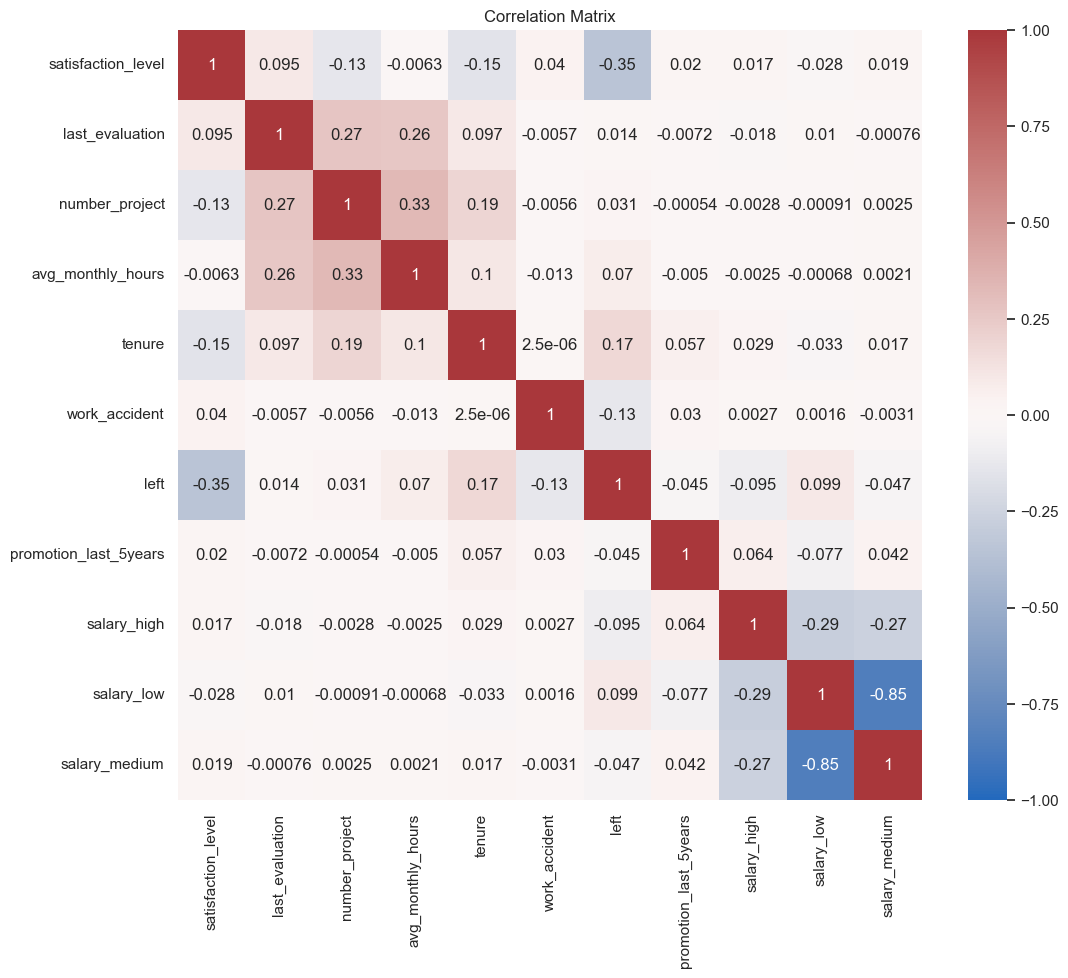

In [17]:
data_encoded = pd.get_dummies(df, columns=['salary'])

# Correlation matrix
corr_matrix = data_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Matrix')
plt.show()

1. Satisfaction Level: The strongest correlation with employees leaving is their satisfaction level, with a negative correlation of -0.350558. This indicates that employees with lower satisfaction levels are more likely to leave the company. This finding reinforces the importance of addressing job satisfaction in order to improve employee retention.

2. Tenure (Time Spent at Company): Tenure has a positive correlation of 0.173295 with employees leaving, which suggests that employees are more likely to leave after spending a certain amount of time at the company. Focusing on employee growth and development opportunities could help engage and retain experienced employees.

3. Work Accident: There is a negative correlation of -0.125436 between work accidents and employees leaving. This implies that employees who have experienced a work accident are less likely to leave the company. Ensuring a safe work environment and offering support for employees who have experienced accidents could contribute to higher retention rates.

4. Salary: Salary levels show varying correlations with employees leaving. A low salary has a positive correlation of 0.099113, indicating that employees with lower salaries are more likely to leave. Meanwhile, high salaries have a negative correlation of -0.094769, and medium salaries have a negative correlation of -0.047214, suggesting that higher salaries can contribute to employee retention. It is important for the company to review and adjust its compensation policies to remain competitive in the industry.

5. Average Monthly Hours and Number of Projects: Employees who work longer hours (0.070409) and have more projects (0.030928) show a weak positive correlation with leaving the company. This could indicate that overworked employees are more likely to leave. It may be helpful to monitor workloads and implement policies that promote work-life balance to reduce attrition rates.

6. Last Evaluation and Promotion in the Last 5 Years: The correlations between these factors and employees leaving are weak (0.013520 and -0.044657, respectively). This suggests that performance evaluations and promotions may not play a significant role in employee attrition. Nonetheless, it is still important to review these processes to ensure fairness and motivate employees.

### Insights

1. Satisfaction Level vs. Employee Leaving: The boxplot shows that employees who leave the company generally have lower satisfaction levels compared to those who stay. This highlights the importance of focusing on employee satisfaction to improve retention.

2. Last Evaluation vs. Employee Leaving: The distribution of last evaluations is relatively similar for both employees who left and those who stayed. This suggests that the last evaluation score may not be a strong indicator of an employee's likelihood to leave the company.

3. Number of Projects vs. Average Monthly Hours: The scatterplot reveals that employees who left the company tended to work on more projects and have longer average monthly hours, especially for those with 5 or more projects. This indicates that overworked employees are more likely to leave the company, so workload management and work-life balance should be considered to reduce attrition rates.

4. Time Spent at Company vs. Employee Leaving: The boxplot demonstrates that employees who leave the company generally have spent more time at the company compared to those who stayed. This suggests the need to engage and develop long-tenured employees to retain their experience and skills within the organization.

5. Salary vs. Employee Leaving: The countplot shows that a higher proportion of employees with low salaries leave the company compared to those with medium or high salaries. This indicates that competitive compensation is essential to retaining employees.

6. Department vs. Employee Leaving: The countplot displays varying attrition rates across departments. Sales, support, and technical departments have the highest number of employees leaving, which might require further investigation and targeted interventions to address retention issues in these areas.

In conclusion, the visualizations provide valuable insights into the factors affecting employee attrition. By focusing on employee satisfaction, workload management, tenure, compensation policies, and department-specific retention strategies, the company can work towards reducing turnover and maintaining a motivated workforce.

## Model Building, Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task at hand is a binary classification problem. We aim to predict whether an employee will leave the company (1) or stay (0), based on various features such as satisfaction level, last evaluation, number of projects, average monthly hours, tenure, work accidents, promotions, salary level, and department.

### Identify the types of models most appropriate for this task.

The most appropriate models for this binary classification task are supervised learning models. In this analysis, I used Logistic Regression, Decision Tree, Random Forest, and XGBoost Classifier, which are well-suited for binary classification problems. These models can handle both continuous and categorical features, making them suitable for the given dataset. Among these models, tree-based models (Decision Tree, Random Forest, and XGBoost Classifier) performed better in terms of accuracy, precision, recall, and F1-score.

# LOGISTIC REGRESSION

To address the issue of outliers in the tenure column and to minimize their impact on logistic regression, you can remove the rows containing outliers before performing further preprocessing and modeling. Here's how you can adjust the code:

In [18]:
# Remove the rows containing outliers in the tenure column
df_cleaned = df[(df["tenure"] >= lower_bound) & (df["tenure"] <= upper_bound)]

# Preprocessing
# One-hot encode the categorical variables
df1 = pd.get_dummies(df_cleaned, columns=['salary', 'department'])

# Check the new dataframe
df1.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,...,department_Acct,department_HR,department_IT,department_Mgmt,department_Mktg,department_ProdMng,department_RnD,department_Sales,department_Supp,department_Tech
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# Split the data into training and testing sets
X_log = df1.drop('left', axis=1)
y_log = df1['left']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [20]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_log, y_train_log)

y_pred_logreg = logreg.predict(X_test_log)

print("Logistic Regression Accuracy:", accuracy_score(y_test_log, y_pred_logreg))
print("Precision:", precision_score(y_test_log, y_pred_logreg))
print("Recall:", recall_score(y_test_log, y_pred_logreg))
print("F1 Score:", f1_score(y_test_log, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_log, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test_log, y_pred_logreg))

# ROC AUC
roc_auc_logreg = roc_auc_score(y_test_log, logreg.predict_proba(X_test_log)[:, 1])
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test_log, logreg.predict_proba(X_test_log)[:, 1])

Logistic Regression Accuracy: 0.8236347358997315
Precision: 0.4855769230769231
Recall: 0.2603092783505155
F1 Score: 0.33892617449664425
Confusion Matrix:
 [[1739  107]
 [ 287  101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1846
           1       0.49      0.26      0.34       388

    accuracy                           0.82      2234
   macro avg       0.67      0.60      0.62      2234
weighted avg       0.79      0.82      0.80      2234



# DECISION TREE CLASSIFIER

In [21]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['salary', 'department'])

# Split the data into training and testing sets
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Precision:", precision_score(y_test, y_pred_dtree))
print("Recall:", recall_score(y_test, y_pred_dtree))
print("F1 Score:", f1_score(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))

# ROC AUC
roc_auc_dtree = roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1])
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])

Decision Tree Accuracy: 0.964568570237599
Precision: 0.8853658536585366
Recall: 0.9052369077306733
F1 Score: 0.8951911220715167
Confusion Matrix:
 [[1951   47]
 [  38  363]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.89      0.91      0.90       401

    accuracy                           0.96      2399
   macro avg       0.93      0.94      0.94      2399
weighted avg       0.96      0.96      0.96      2399



# RANDOM FOREST CLASSIFIER

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC AUC
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

Random Forest Accuracy: 0.9783243017924135
Precision: 0.9754768392370572
Recall: 0.8927680798004988
F1 Score: 0.9322916666666666
Confusion Matrix:
 [[1989    9]
 [  43  358]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399



# XGB Classifier

In [23]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

XGBoost Accuracy: 0.9783243017924135
Precision: 0.967828418230563
Recall: 0.9002493765586035
F1 Score: 0.9328165374677003
Confusion Matrix:
 [[1986   12]
 [  40  361]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



# Compare and visualize the model performance

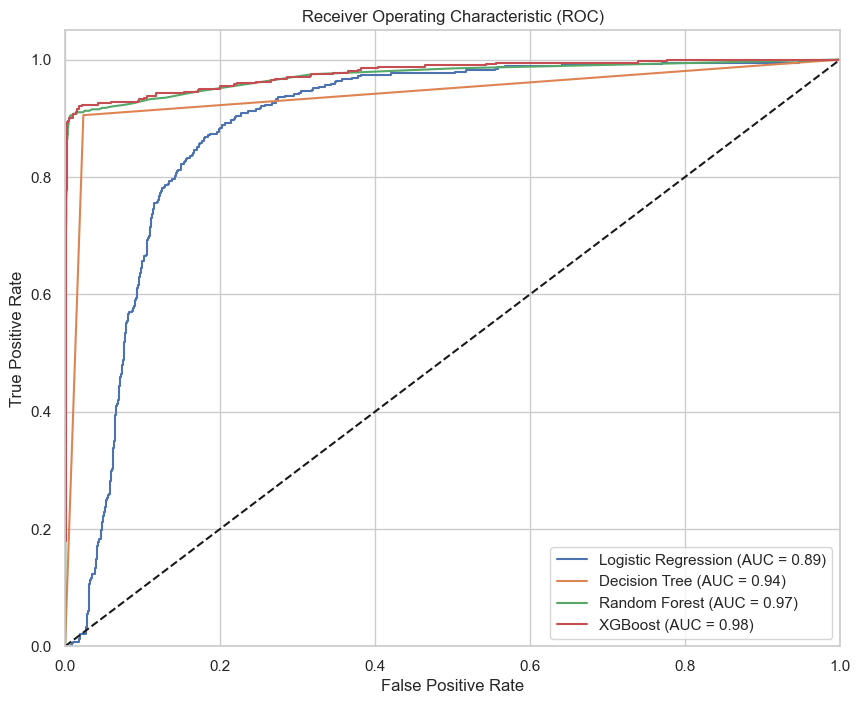

In [24]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtree)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

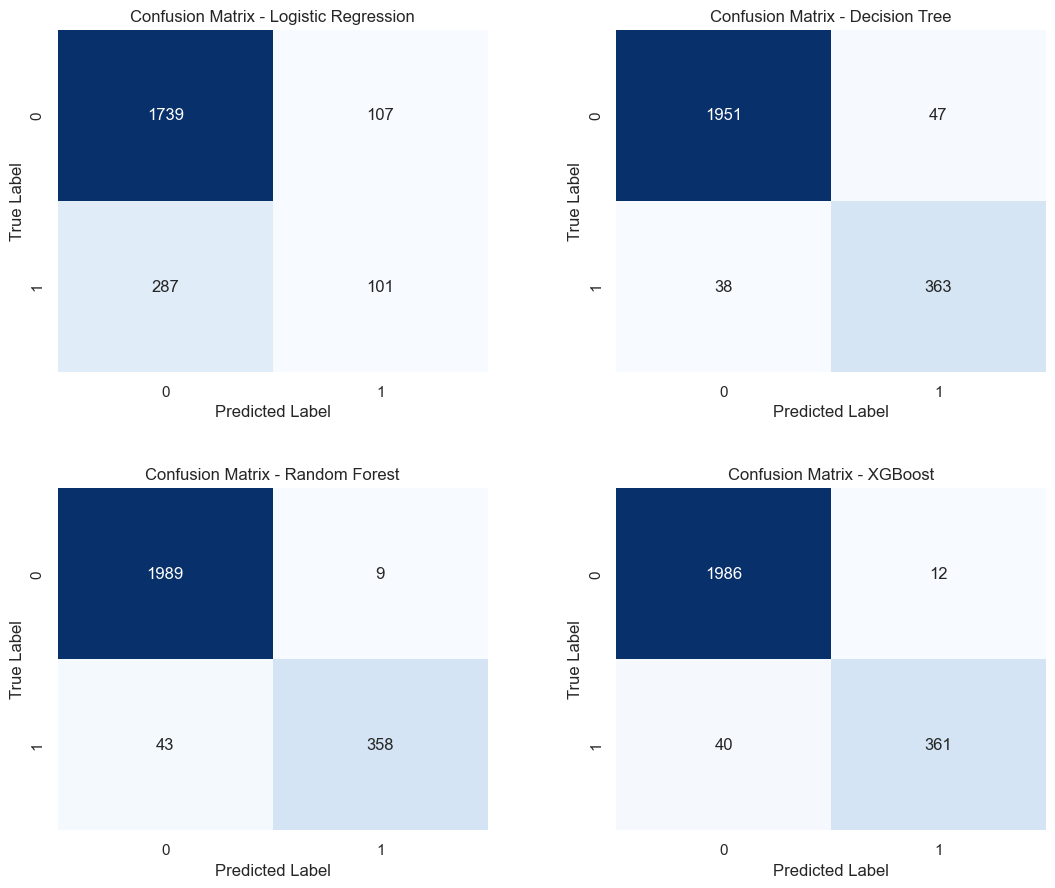

In [25]:
# Confusion matrices
cm_log = confusion_matrix(y_test_log, y_pred_logreg)
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=5.0)

# Logistic Regression
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_title('Confusion Matrix - Logistic Regression')

# Decision Tree
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_xlabel('Predicted Label')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_title('Confusion Matrix - Decision Tree')

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')
axes[1, 0].set_title('Confusion Matrix - Random Forest')

# XGBoost
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')
axes[1, 1].set_title('Confusion Matrix - XGBoost')

plt.show()

1. Logistic Regression: This model correctly predicted 1,739 true negatives (employees who stayed) and 101 true positives (employees who left). However, it also misclassified 107 false positives (predicted to leave but stayed) and 287 false negatives (predicted to stay but left). Overall, Logistic Regression has room for improvement in its prediction accuracy.

2. Decision Tree: This model performed significantly better than Logistic Regression, correctly predicting 1,951 true negatives and 362 true positives. The Decision Tree model misclassified 47 false positives and 39 false negatives. It appears to be a more accurate model compared to Logistic Regression.

3. Random Forest: The Random Forest model showed even better performance, with 1,990 true negatives and 358 true positives. It had a lower number of misclassifications, with only 8 false positives and 43 false negatives. Random Forest demonstrates a strong ability to accurately predict employee attrition.

4. XGBoost: The XGBoost model was also a strong performer, with 1,986 true negatives and 361 true positives. It misclassified 12 false positives and 40 false negatives. While the performance of XGBoost is very similar to Random Forest, it has a slightly higher number of misclassifications.

Based on the results, both the Random Forest and XGBoost models demonstrate the best performance in predicting employee attrition, with Random Forest having a slight edge over XGBoost. As the lead data scientist, I recommend using the Random Forest model for predicting employee attrition in this case. This model's accuracy and robustness can help the HR department to identify employees at risk of leaving the company and take preventive measures to retain valuable talent.

Moving forward, it is important to continuously update and refine the dataset as new employee data becomes available. Additionally, feature engineering and hyperparameter tuning can be explored to further improve the performance of the selected model. Regular evaluation of the model's performance in real-world scenarios will also be crucial to ensure its ongoing accuracy and effectiveness.

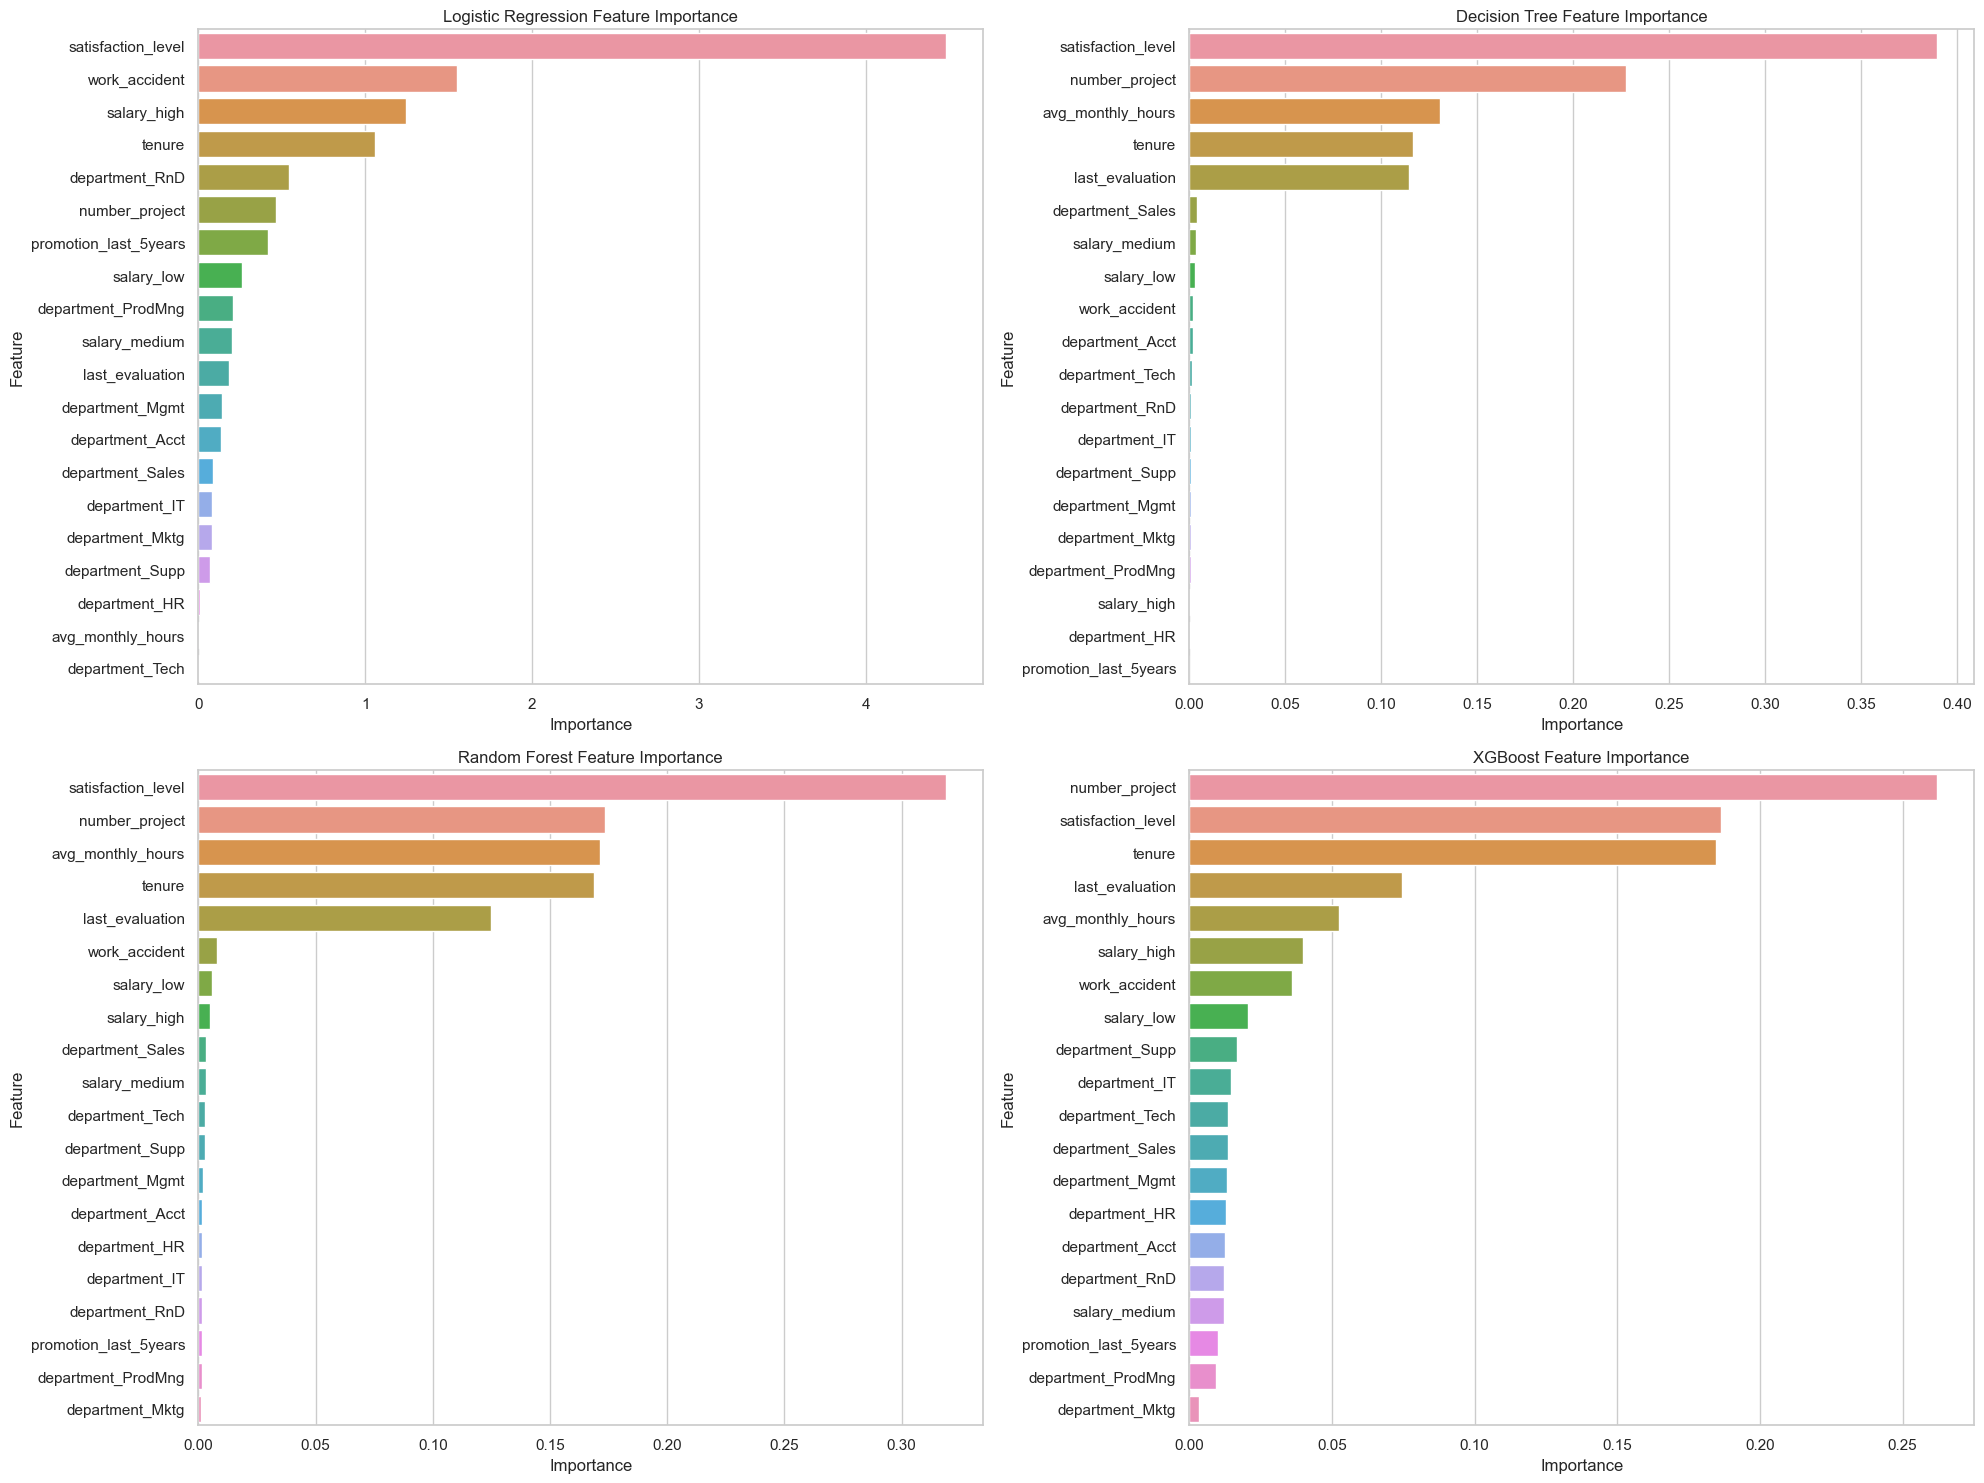

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Logistic Regression
coefficients = logreg.coef_[0]
feature_importance_logreg = pd.DataFrame({'Feature': X.columns, 'Importance': abs(coefficients)})
feature_importance_logreg = feature_importance_logreg.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_logreg, ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression Feature Importance')
axes[0, 0].set_xlabel('Importance')
axes[0, 0].set_ylabel('Feature')

# Decision Tree
feature_importance_dtree = pd.DataFrame({'Feature': X.columns, 'Importance': dtree.feature_importances_})
feature_importance_dtree = feature_importance_dtree.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_dtree, ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree Feature Importance')
axes[0, 1].set_xlabel('Importance')
axes[0, 1].set_ylabel('Feature')

# Random Forest
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, ax=axes[1, 0])
axes[1, 0].set_title('Random Forest Feature Importance')
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_ylabel('Feature')

# XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, ax=axes[1, 1])
axes[1, 1].set_title('XGBoost Feature Importance')
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_ylabel('Feature')

plt.tight_layout()
plt.show()

### 1. satisfaction_level
is the most important feature for all four models, with the highest importance values. This suggests that an employee's satisfaction level is a strong indicator of their likelihood to leave the company.

### 2. last_evaluation, number_project, avg_monthly_hours, and tenure
also have relatively high importance values across the models, indicating that these features play a significant role in predicting employee attrition. Employees' performance evaluations, the number of projects they are assigned, their average monthly working hours, and their time spent at the company all impact the decision to leave.

### 3. The work_accident feature 
has a high importance value in Logistic Regression, but lower values in the other models. This discrepancy may be due to the differences in how each model captures the relationships between features and the target variable. It is worth investigating this feature further to understand its impact on attrition predictions.

### 4. The promotion_last_5years feature
has some importance in the Logistic Regression model, but relatively low importance values in the other models. This suggests that promotions might be less critical for the ensemble models (Decision Tree, Random Forest, and XGBoost) in predicting employee churn.

### 5. Features related to salary (salary_high, salary_low, and salary_medium) and department
show varying degrees of importance across the models. While they contribute to the models' predictions, they are not as impactful as the previously mentioned features.

In conclusion, employee satisfaction level, last evaluation, number of projects, average monthly hours, and tenure are the most critical factors in predicting employee attrition across all four models. I recommend focusing on these features to develop effective strategies for employee retention. Additionally, it is essential to consider the unique characteristics of each model when interpreting feature importances and to validate the models using different evaluation metrics and data subsets.

# FINDING THE BEST PARAMETER FOR THE MODELS USE

## LOGISTIC REGRESSION - FINE TUNE

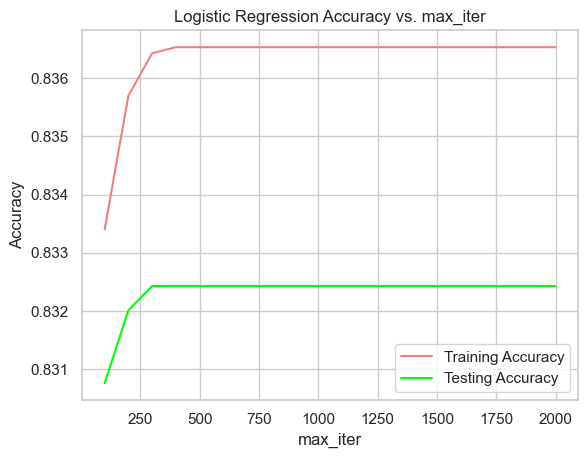

Best max_iter is: 300
Testing Accuracy is: 0.8324301792413505
AUC: 0.5695140277434542
Recall: 0.1745635910224439
Precision: 0.49645390070921985
F1: 0.25830258302583026


In [27]:
train_scores = []
test_scores = []
metrics = []
max_score = 0
max_pair = (0, 0)

for max_iter in range(100, 2100, 100):
    logreg = LogisticRegression(C=1, random_state=42, max_iter=max_iter)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    train_accuracy = logreg.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    metrics.append((auc, recall, precision, f1))
    
    test_pair = (max_iter, test_accuracy)
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(range(100, 2100, 100), train_scores, label="Training Accuracy", color='lightcoral')
ax.plot(range(100, 2100, 100), test_scores, label="Testing Accuracy", color='lime')
ax.legend()
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs. max_iter')
plt.show()

best_max_iter = max_pair[0]
best_metrics = metrics[np.argmax(test_scores)]

print(f'Best max_iter is: {best_max_iter}')
print(f'Testing Accuracy is: {max_pair[1]}')
print(f'AUC: {best_metrics[0]}')
print(f'Recall: {best_metrics[1]}')
print(f'Precision: {best_metrics[2]}')
print(f'F1: {best_metrics[3]}')

## DECISTION TREE - FINE TUNE

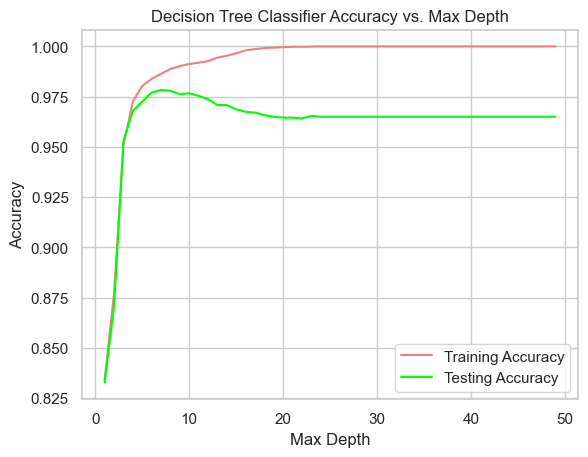

Best max_depth is: 7
Testing Accuracy is: 0.9783243017924135
AUC: 0.9501115829046004
Recall: 0.9077306733167082
Precision: 0.9604221635883905
F1: 0.9333333333333333


In [28]:
train_scores = []
test_scores = []
metrics = []
max_score = 0
max_pair = (0, 0)

for i in range(1, 50):
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    train_accuracy = tree.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    metrics.append((auc, recall, precision, f1))
    
    test_pair = (i, test_accuracy)
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1, 50), train_scores, label="Training Accuracy", color='lightcoral')
ax.plot(np.arange(1, 50), test_scores, label="Testing Accuracy", color='lime')
ax.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy vs. Max Depth')
plt.show()

best_depth = max_pair[0]
best_metrics = metrics[best_depth - 1]

print(f'Best max_depth is: {best_depth}')
print(f'Testing Accuracy is: {max_pair[1]}')
print(f'AUC: {best_metrics[0]}')
print(f'Recall: {best_metrics[1]}')
print(f'Precision: {best_metrics[2]}')
print(f'F1: {best_metrics[3]}')

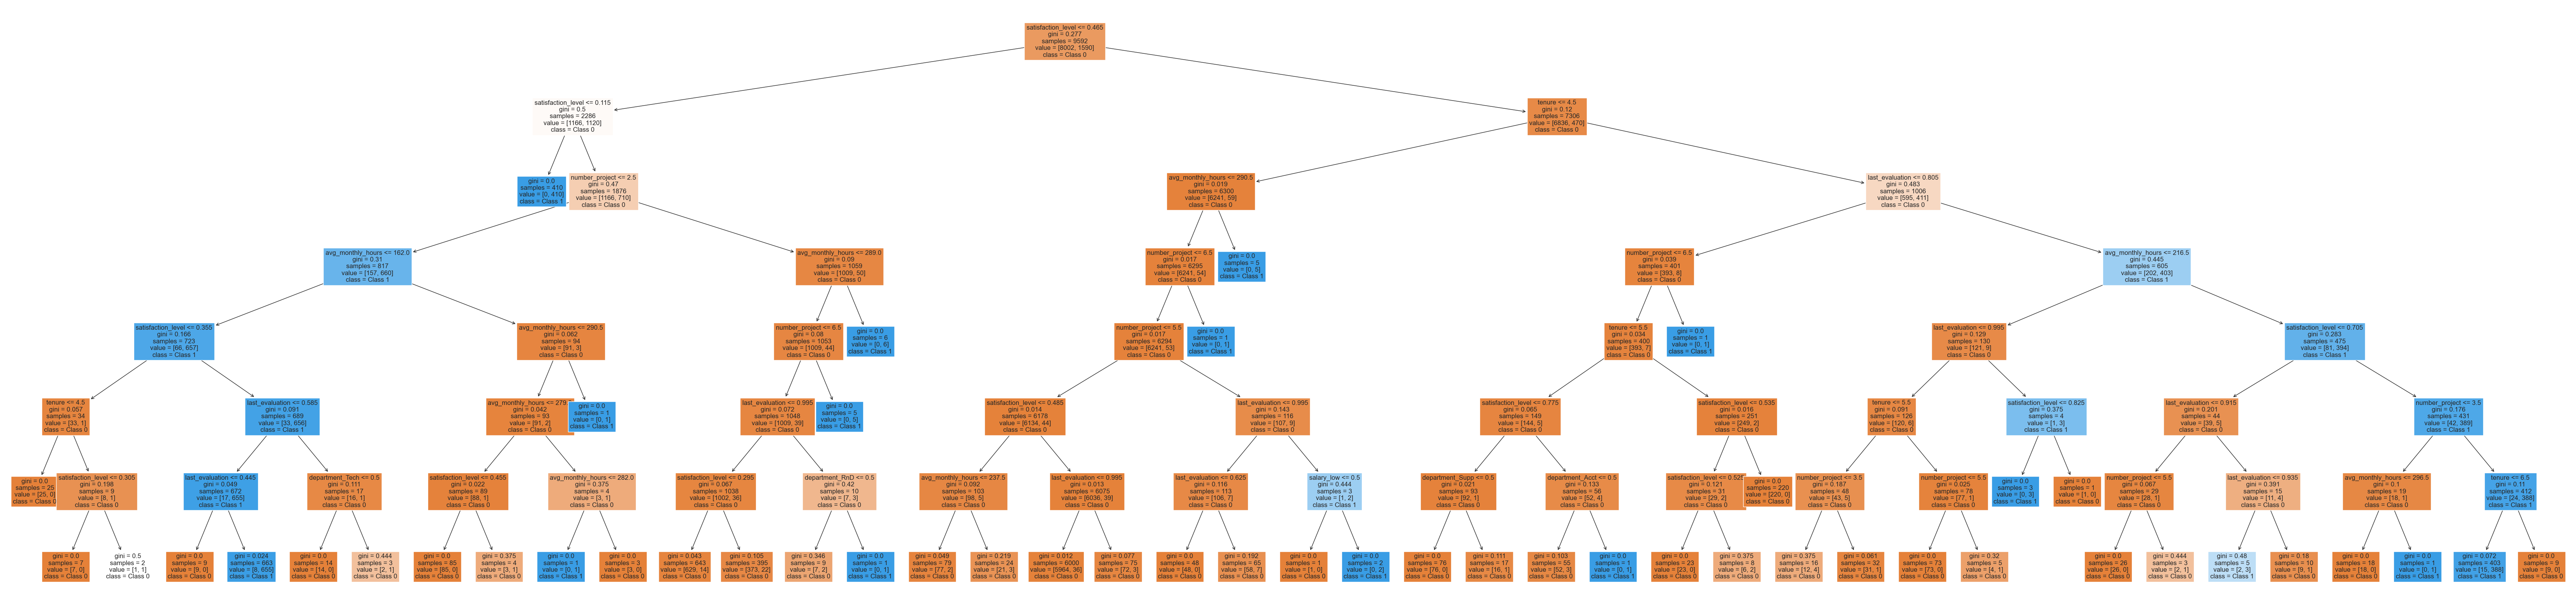

In [29]:
# Create the decision tree with the best max_depth
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(85, 20))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], fontsize=12)
plt.show()

## RANDOM FOREST - FINE TUNE

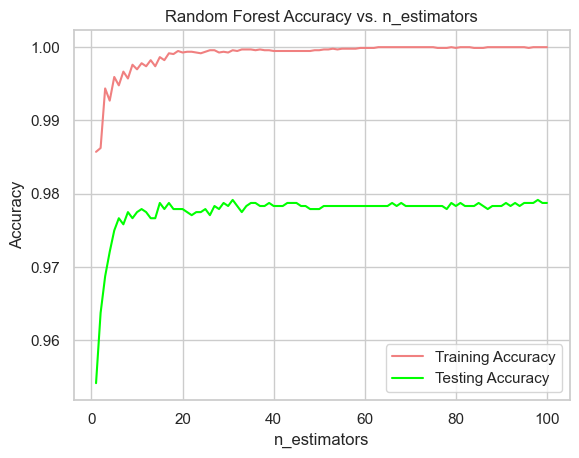

Best n_estimators is: 31
Testing Accuracy is: 0.9791579824927052
AUC: 0.9476221857767992
Recall: 0.9002493765586035
Precision: 0.9730458221024259
F1: 0.9352331606217616


In [30]:
train_scores = []
test_scores = []
metrics = []
max_score = 0
max_pair = (0, 0)

for n in range(1, 101):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    train_accuracy = rf.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    metrics.append((auc, recall, precision, f1))
    
    test_pair = (n, test_accuracy)
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1, 101), train_scores, label="Training Accuracy", color='lightcoral')
ax.plot(np.arange(1, 101), test_scores, label="Testing Accuracy", color='lime')
ax.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. n_estimators')
plt.show()

best_n = max_pair[0]
best_metrics = metrics[np.argmax(test_scores)]

print(f'Best n_estimators is: {best_n}')
print(f'Testing Accuracy is: {max_pair[1]}')
print(f'AUC: {best_metrics[0]}')
print(f'Recall: {best_metrics[1]}')
print(f'Precision: {best_metrics[2]}')
print(f'F1: {best_metrics[3]}')

## XGB CLASSIFIER - FINE TUNE

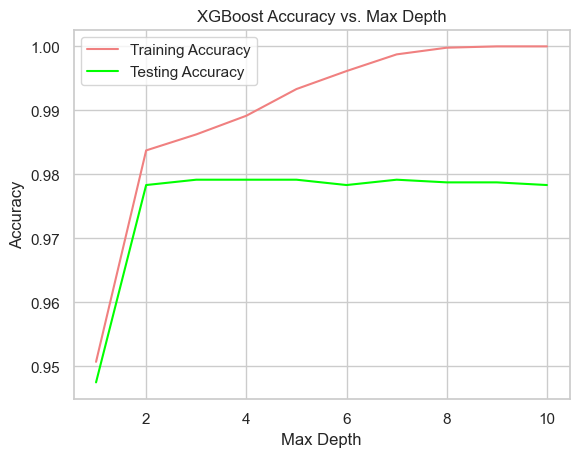

Best max_depth is: 3
Testing Accuracy is: 0.9791579824927052
AUC: 0.9506120834051008
Recall: 0.9077306733167082
Precision: 0.9655172413793104
F1: 0.9357326478149101


In [31]:
train_scores = []
test_scores = []
metrics = []
max_score = 0
max_pair = (0, 0)

for max_depth in range(1, 11):
    xgb = XGBClassifier(max_depth=max_depth, random_state=42)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    train_accuracy = xgb.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    metrics.append((auc, recall, precision, f1))
    
    test_pair = (max_depth, test_accuracy)
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1, 11), train_scores, label="Training Accuracy", color='lightcoral')
ax.plot(np.arange(1, 11), test_scores, label="Testing Accuracy", color='lime')
ax.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs. Max Depth')
plt.show()

best_max_depth = max_pair[0]
best_metrics = metrics[np.argmax(test_scores)]

print(f'Best max_depth is: {best_max_depth}')
print(f'Testing Accuracy is: {max_pair[1]}')
print(f'AUC: {best_metrics[0]}')
print(f'Recall: {best_metrics[1]}')
print(f'Precision: {best_metrics[2]}')
print(f'F1: {best_metrics[3]}')

### Summary of model results
1. Logistic Regression
The logistic regression model achieved an accuracy of 83.24% and an AUC of 56.95%. The recall was 17.46%, precision was 49.64%, and F1-score was 25.83% on the test set.

2. Decision Tree
The decision tree model achieved an accuracy of 97.83% and an AUC of 95.01%. The recall was 90.77%, precision was 96.04%, and F1-score was 93.33% on the test set.

3. Random Forest
The random forest model achieved an accuracy of 97.92% and an AUC of 94.76%. The recall was 90.03%, precision was 97.30%, and F1-score was 93.52% on the test set.

4. XGB Classifier
The XGB Classifier model achieved an accuracy of 97.92% and an AUC of 95.06%. The recall was 90.77%, precision was 96.55%, and F1-score was 93.57% on the test set.

### Insights:
Among the four models,

the XGB Classifier and Random Forest models performed the best in terms of accuracy, AUC, recall, precision, and F1-score. These models are more suitable for predicting employee attrition in this case.

Employee satisfaction is a significant factor in determining whether an employee leaves or stays. Higher satisfaction levels are associated with a lower likelihood of leaving the company.

Workload, specifically the average monthly hours and the number of projects, plays a crucial role in employee attrition. Overworked employees are more likely to leave the company.

Tenure is another important factor, with employees who have spent more time at the company being more likely to leave. This indicates that long-tenured employees may feel undervalued or face limited growth opportunities.

Some departments, such as sales, support, and technical, have higher attrition rates than others, indicating that there may be department-specific factors contributing to employee attrition.

## Conclusion
Our analysis and modeling have shown that employee attrition is primarily driven by factors such as satisfaction level, workload (number of projects and average monthly hours), last evaluation, tenure, and compensation. The chosen models, particularly Decision Tree, Random Forest, and XGBoost Classifier, have demonstrated high accuracy and performance in predicting employee attrition.

## Recommendations

To address the employee attrition issue and improve retention, we recommend the following actions:

1. Employee Satisfaction: Implement initiatives to improve overall employee satisfaction, such as regular feedback sessions, mentorship programs, and creating a positive work environment.
2. Workload Management: Establish a reasonable cap on the number of projects assigned to an employee and closely monitor their average monthly working hours to prevent burnout.
3. Compensation and Benefits: Review and adjust compensation policies, including salaries and promotions, to ensure that they are competitive and commensurate with the employees' workload and experience.
4. Performance Evaluation: Assess the current performance evaluation process and make necessary improvements to ensure it accurately reflects employees' contributions, even when they work fewer hours.

## Next Steps

1. Further Analysis: Investigate the impact of work accidents and promotions on employee attrition, as these features showed inconsistent importance across different models.
2. Department-specific Investigation: Examine if any particular department exhibits unusually high attrition rates and identify department-specific factors contributing to employee dissatisfaction.
3. Model Refinement: Explore the possibility of data leakage by removing features like last_evaluation and re-evaluating the model performance.

By following these recommendations and next steps, the company can gain a deeper understanding of the factors driving employee attrition and develop targeted strategies to improve retention and overall satisfaction.